In [3]:
from pymatgen.io.vasp import Poscar
from pymatgen.io.vasp import Vasprun
from pymatgen.core.structure import Structure
import matplotlib.pyplot as plt
import scienceplots
import subprocess
import numpy as np

plt.style.use(['science','nature'])

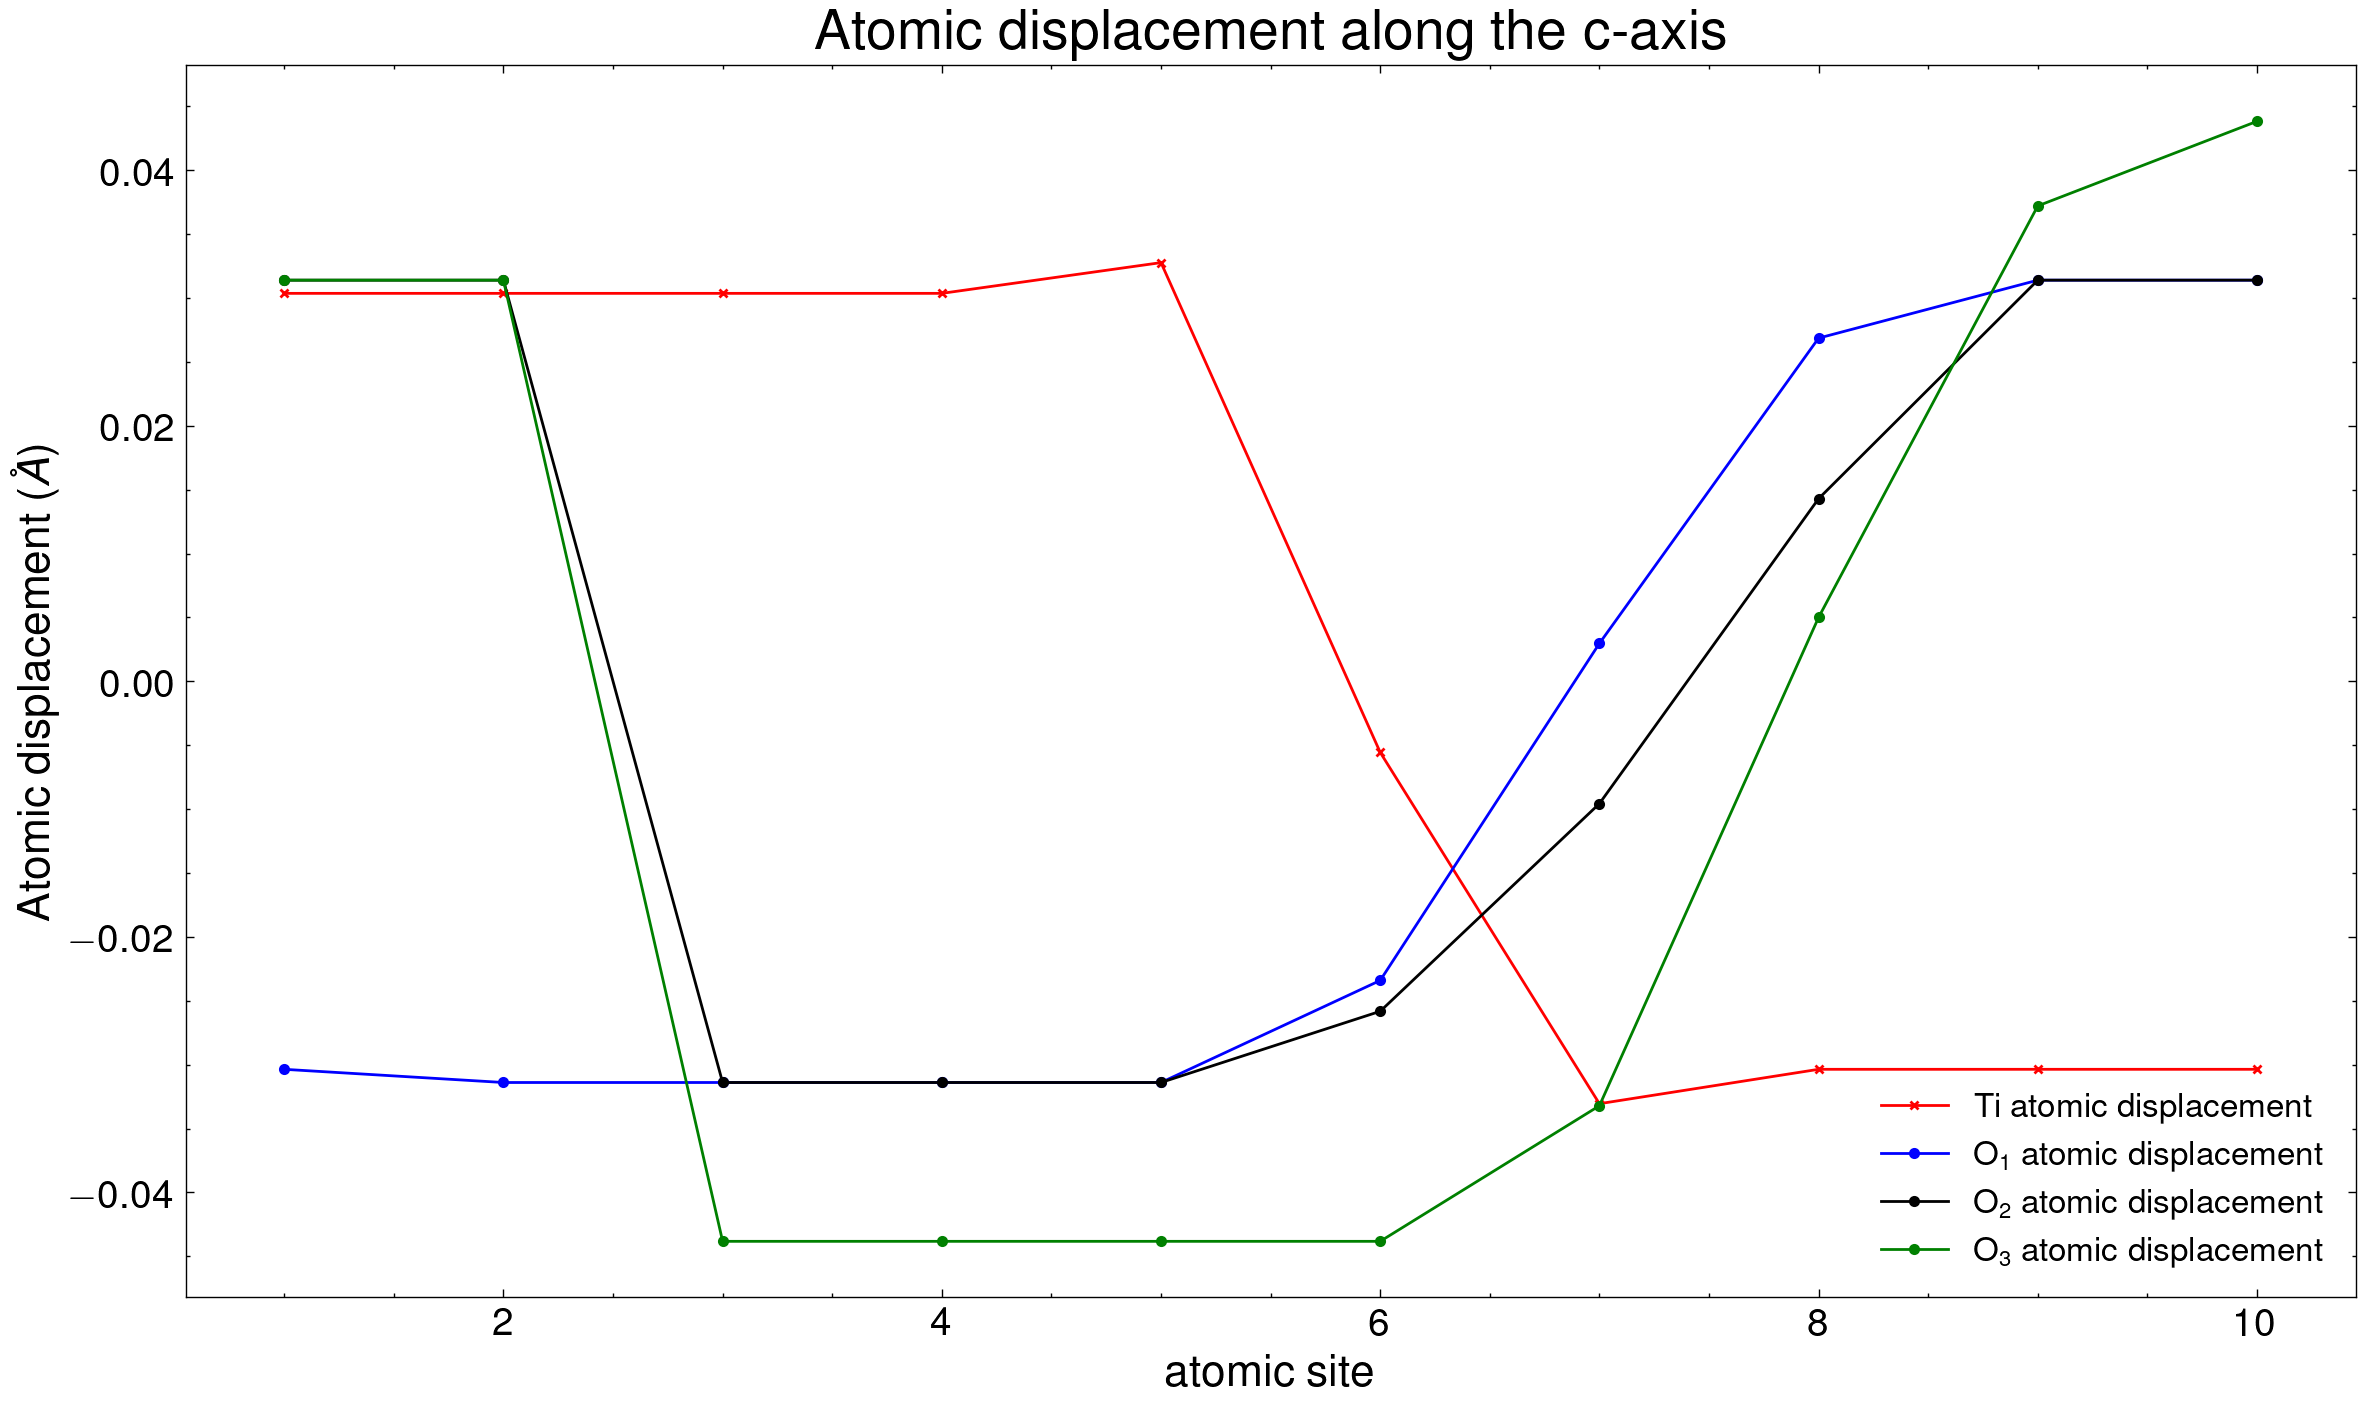

In [18]:

# Read the supercell POSCAR file
sup_poscar = Poscar.from_file('./files/POSCAR_super_3')
sup_struc = sup_poscar.structure

gen_POSCAR = False # Set it false if you only want to analyze the atomic displacement data
num_cell = 10 # Number of unit cells in the supercell
latt = np.array([[ 3.953265, 0, 0], # Tetragonal lattice parameters
                    [ 0, 3.953265, 0],
                    [ 0, 0, 3.970536]])

Ti_z_coord = []
O1_z_coord = []
O2_z_coord = []
O3_z_coord = []
atomic_site = np.arange(1, num_cell+1, 1)   

for i in range(num_cell):
    coord =  np.array([sup_struc.cart_coords[i] - [0, latt[1][1]*i, 0], # Ba
                       sup_struc.cart_coords[i+1*num_cell] - [0, latt[1][1]*i, 0], # Ti
                       sup_struc.cart_coords[i+2*num_cell] - [0, latt[1][1]*i, 0], # O1
                       sup_struc.cart_coords[i+3*num_cell] - [0, latt[1][1]*i, 0], # O2
                       sup_struc.cart_coords[i+4*num_cell] - [0, latt[1][1]*i, 0]]) # O3
    
    new_struc = Structure(lattice=latt, species=["Ba", "Ti", "O", "O", "O"], coords=coord, coords_are_cartesian=True)
    
    Ti_z_coord.append(new_struc.cart_coords[1][2] - latt[2][2]/2)
    O1_z_coord.append(new_struc.cart_coords[2][2] - latt[2][2]/2)
    O2_z_coord.append(new_struc.cart_coords[3][2] - latt[2][2]/2)
    # O3_z_coord.append(new_struc.cart_coords[4][2] - latt[2][2]/2)
    if np.abs(new_struc.cart_coords[4][2]) > 1.5:
        O3_z_coord.append(new_struc.cart_coords[4][2] - latt[2][2])
    else:
        O3_z_coord.append(new_struc.cart_coords[4][2])    
    if gen_POSCAR == True:
        new_struc.to(filename='POSCAR_'f"{i+1:02d}")

O3_z_coord[0] = O3_z_coord[0] + latt[2][2]/2
O3_z_coord[1] = O3_z_coord[1] + latt[2][2]/2

xx = atomic_site
plt.figure(figsize=(14, 8), dpi=200)
plt.plot(xx, Ti_z_coord, '-xr',label='Ti atomic displacement')
plt.plot(xx, O1_z_coord, '-ob',label=r'O$_1$ atomic displacement')
plt.plot(xx, O2_z_coord, '-ok',label=r'O$_2$ atomic displacement')
plt.plot(xx, O3_z_coord, '-og',label=r'O$_3$ atomic displacement')
plt.xlabel('atomic site', fontsize=16)
plt.ylabel(r'Atomic displacement ($\AA$)', fontsize=16)
plt.title('Atomic displacement along the c-axis', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=12)
plt.show()

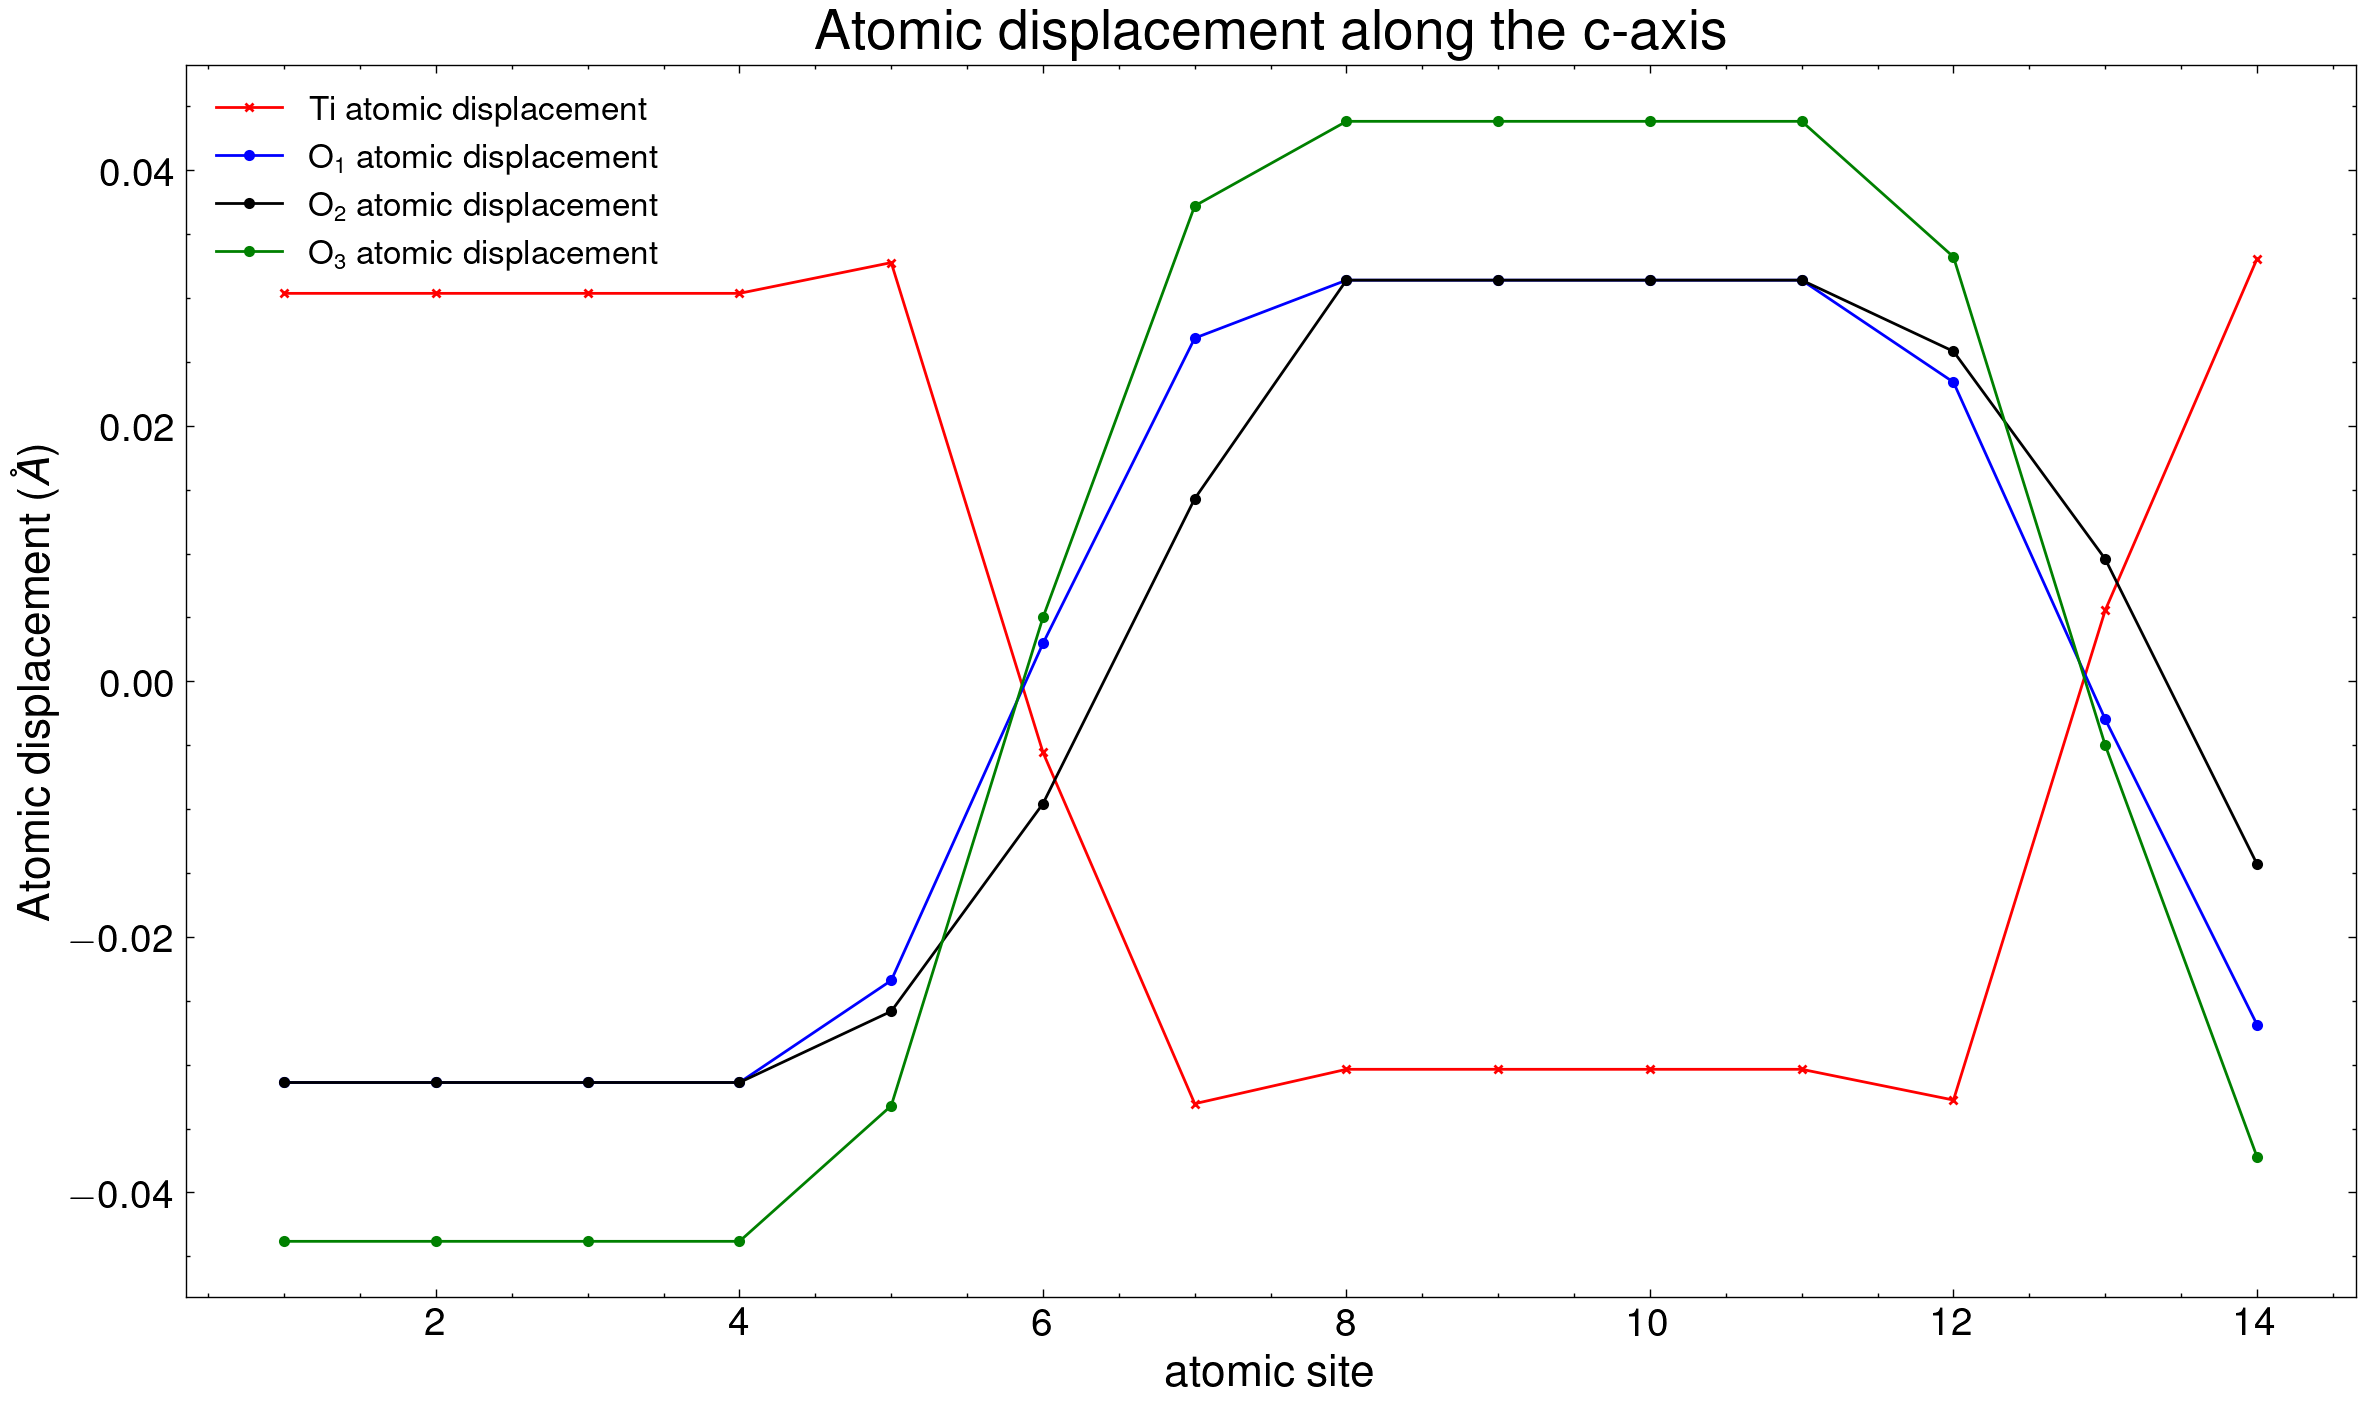

In [30]:
# Read the supercell POSCAR file
sup_poscar = Poscar.from_file('./files/CONTCAR_super_3')
sup_struc = sup_poscar.structure

gen_POSCAR = False # Set it false if you only want to analyze the atomic displacement data
num_cell = 14 # Number of unit cells in the supercell
latt = np.array([[ 3.953265, 0, 0], # Tetragonal lattice parameters
                    [ 0, 3.953265, 0],
                    [ 0, 0, 3.970536]])

Ti_z_coord = []
O1_z_coord = []
O2_z_coord = []
O3_z_coord = []
atomic_site = np.arange(1, num_cell+1, 1)   

for i in range(num_cell):
    coord =  np.array([sup_struc.cart_coords[i] - [0, latt[1][1]*i, 0], # Ba
                       sup_struc.cart_coords[i+1*num_cell] - [0, latt[1][1]*i, 0], # Ti
                       sup_struc.cart_coords[i+2*num_cell] - [0, latt[1][1]*i, 0], # O1
                       sup_struc.cart_coords[i+3*num_cell] - [0, latt[1][1]*i, 0], # O2
                       sup_struc.cart_coords[i+4*num_cell] - [0, latt[1][1]*i, 0]]) # O3
    
    new_struc = Structure(lattice=latt, species=["Ba", "Ti", "O", "O", "O"], coords=coord, coords_are_cartesian=True)
    
    Ti_z_coord.append(new_struc.cart_coords[1][2] - latt[2][2]/2)
    O1_z_coord.append(new_struc.cart_coords[2][2] - latt[2][2]/2)
    O2_z_coord.append(new_struc.cart_coords[3][2] - latt[2][2]/2)
    # O3_z_coord.append(new_struc.cart_coords[4][2] - latt[2][2]/2)
    if np.abs(new_struc.cart_coords[4][2]) > 1.5:
        O3_z_coord.append(new_struc.cart_coords[4][2] - latt[2][2])
    else:
        O3_z_coord.append(new_struc.cart_coords[4][2])    
    if gen_POSCAR == True:
        new_struc.to(filename='POSCAR_'f"{i+1:02d}")

 
xx = atomic_site
plt.figure(figsize=(14, 8), dpi=200)
plt.plot(xx, Ti_z_coord, '-xr',label='Ti atomic displacement')
plt.plot(xx, O1_z_coord, '-ob',label=r'O$_1$ atomic displacement')
plt.plot(xx, O2_z_coord, '-ok',label=r'O$_2$ atomic displacement')
plt.plot(xx, O3_z_coord, '-og',label=r'O$_3$ atomic displacement')
plt.xlabel('atomic site', fontsize=16)
plt.ylabel(r'Atomic displacement ($\AA$)', fontsize=16)
plt.title('Atomic displacement along the c-axis', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=12)
plt.show()

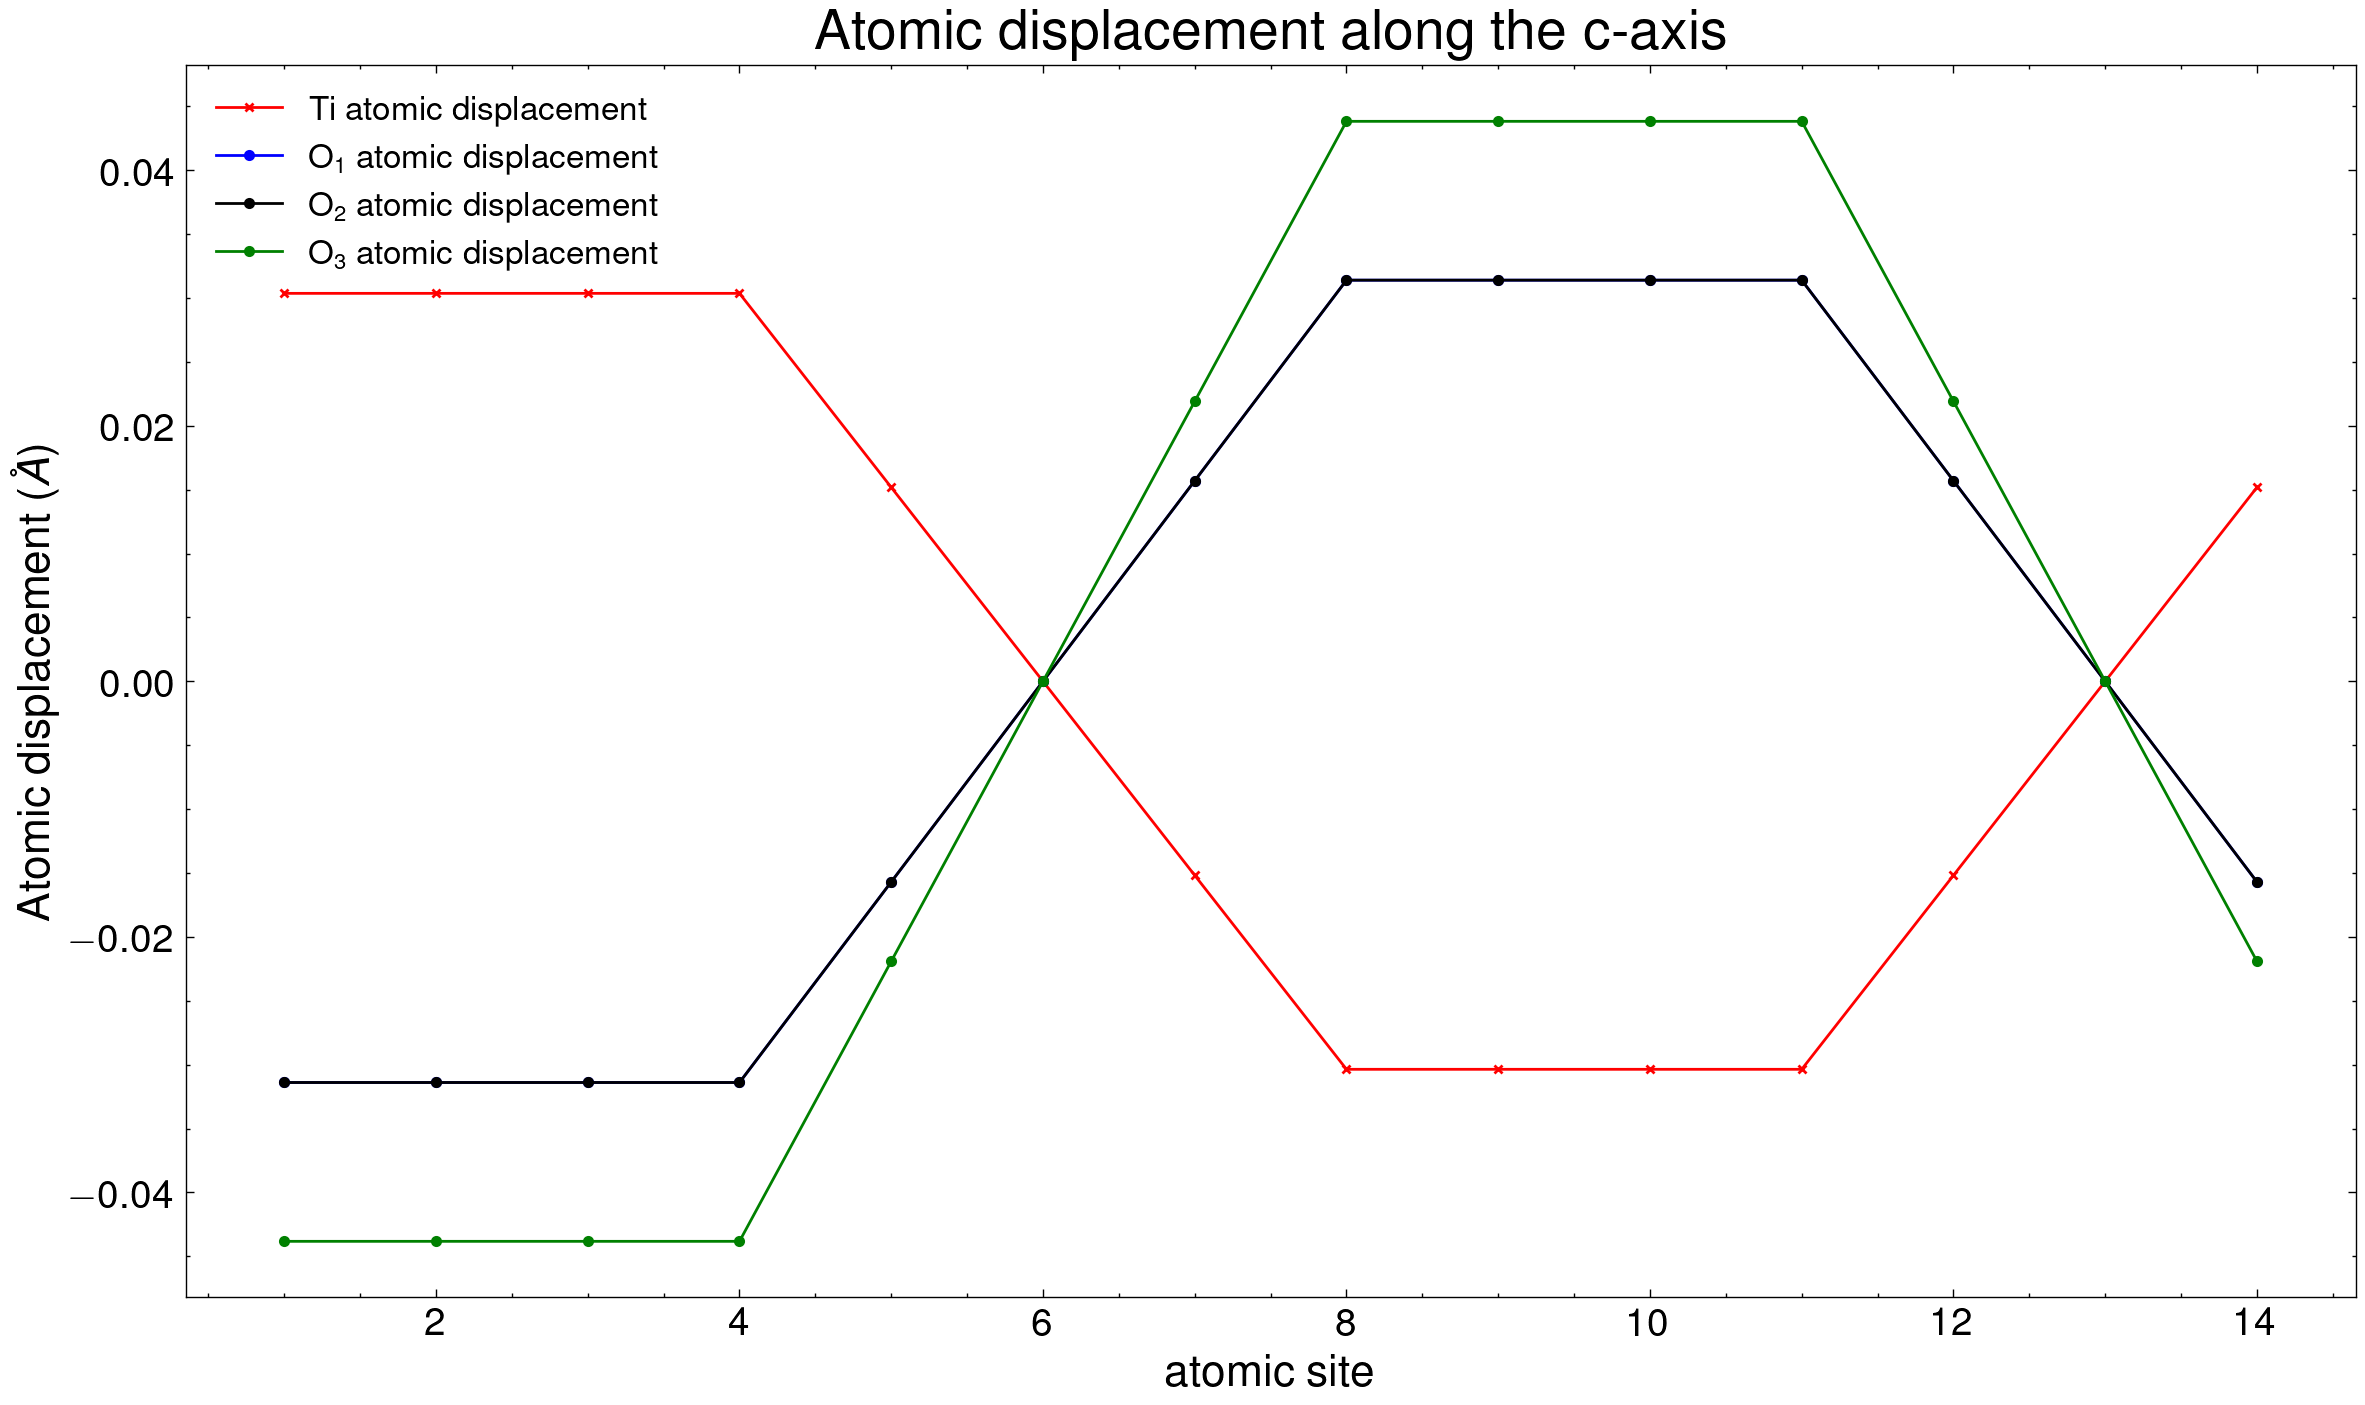

In [34]:

# Read the supercell POSCAR file
sup_poscar = Poscar.from_file('./files/POSCAR_super_DW_3')
sup_struc = sup_poscar.structure

gen_POSCAR = False # Set it false if you only want to analyze the atomic displacement data
num_cell = 14 # Number of unit cells in the supercell
latt = np.array([[ 3.953265, 0, 0], # Tetragonal lattice parameters
                    [ 0, 3.953265, 0],
                    [ 0, 0, 3.970536]])

Ti_z_coord = []
O1_z_coord = []
O2_z_coord = []
O3_z_coord = []
atomic_site = np.arange(1, num_cell+1, 1)   

for i in range(num_cell):
    coord =  np.array([sup_struc.cart_coords[i] - [0, latt[1][1]*i, 0], # Ba
                       sup_struc.cart_coords[i+1*num_cell] - [0, latt[1][1]*i, 0], # Ti
                       sup_struc.cart_coords[i+2*num_cell] - [0, latt[1][1]*i, 0], # O1
                       sup_struc.cart_coords[i+3*num_cell] - [0, latt[1][1]*i, 0], # O2
                       sup_struc.cart_coords[i+4*num_cell] - [0, latt[1][1]*i, 0]]) # O3
    
    new_struc = Structure(lattice=latt, species=["Ba", "Ti", "O", "O", "O"], coords=coord, coords_are_cartesian=True)
    
    Ti_z_coord.append(new_struc.cart_coords[1][2] - latt[2][2]/2)
    O1_z_coord.append(new_struc.cart_coords[2][2] - latt[2][2]/2)
    O2_z_coord.append(new_struc.cart_coords[3][2] - latt[2][2]/2)
    # O3_z_coord.append(new_struc.cart_coords[4][2] - latt[2][2]/2)
    if np.abs(new_struc.cart_coords[4][2]) > 1.5:
        O3_z_coord.append(new_struc.cart_coords[4][2] - latt[2][2])
    else:
        O3_z_coord.append(new_struc.cart_coords[4][2])    
    if gen_POSCAR == True:
        new_struc.to(filename='POSCAR_'f"{i+1:02d}")

xx = atomic_site
plt.figure(figsize=(14, 8), dpi=200)
plt.plot(xx, Ti_z_coord, '-xr',label='Ti atomic displacement')
plt.plot(xx, O1_z_coord, '-ob',label=r'O$_1$ atomic displacement')
plt.plot(xx, O2_z_coord, '-ok',label=r'O$_2$ atomic displacement')
plt.plot(xx, O3_z_coord, '-og',label=r'O$_3$ atomic displacement')
plt.xlabel('atomic site', fontsize=16)
plt.ylabel(r'Atomic displacement ($\AA$)', fontsize=16)
plt.title('Atomic displacement along the c-axis', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=12)
plt.show()

Full Formula (Ba32 Ti32 O96)
Reduced Formula: BaTiO3
abc   :   3.953265 126.504485   3.953265
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (160)
  #  SP      a         b         c  selective_dynamics     velocities
---  ----  ---  --------  --------  ---------------------  ---------------
  0  Ba    0    0         0         [False, False, False]  [0.0, 0.0, 0.0]
  1  Ba    0    0.03125   0         [False, False, False]  [0.0, 0.0, 0.0]
  2  Ba    0    0.0625    0         [False, False, False]  [0.0, 0.0, 0.0]
  3  Ba    0    0.09375   0         [False, False, False]  [0.0, 0.0, 0.0]
  4  Ba    0    0.125     0         [False, False, False]  [0.0, 0.0, 0.0]
  5  Ba    0    0.15625   0         [False, False, False]  [0.0, 0.0, 0.0]
  6  Ba    0    0.1875    0         [False, False, False]  [0.0, 0.0, 0.0]
  7  Ba    0    0.21875   0         [False, False, False]  [0.0, 0.0, 0.0]
  8  Ba    0    0.25      0         [False, False, False]  [0.0, 0.

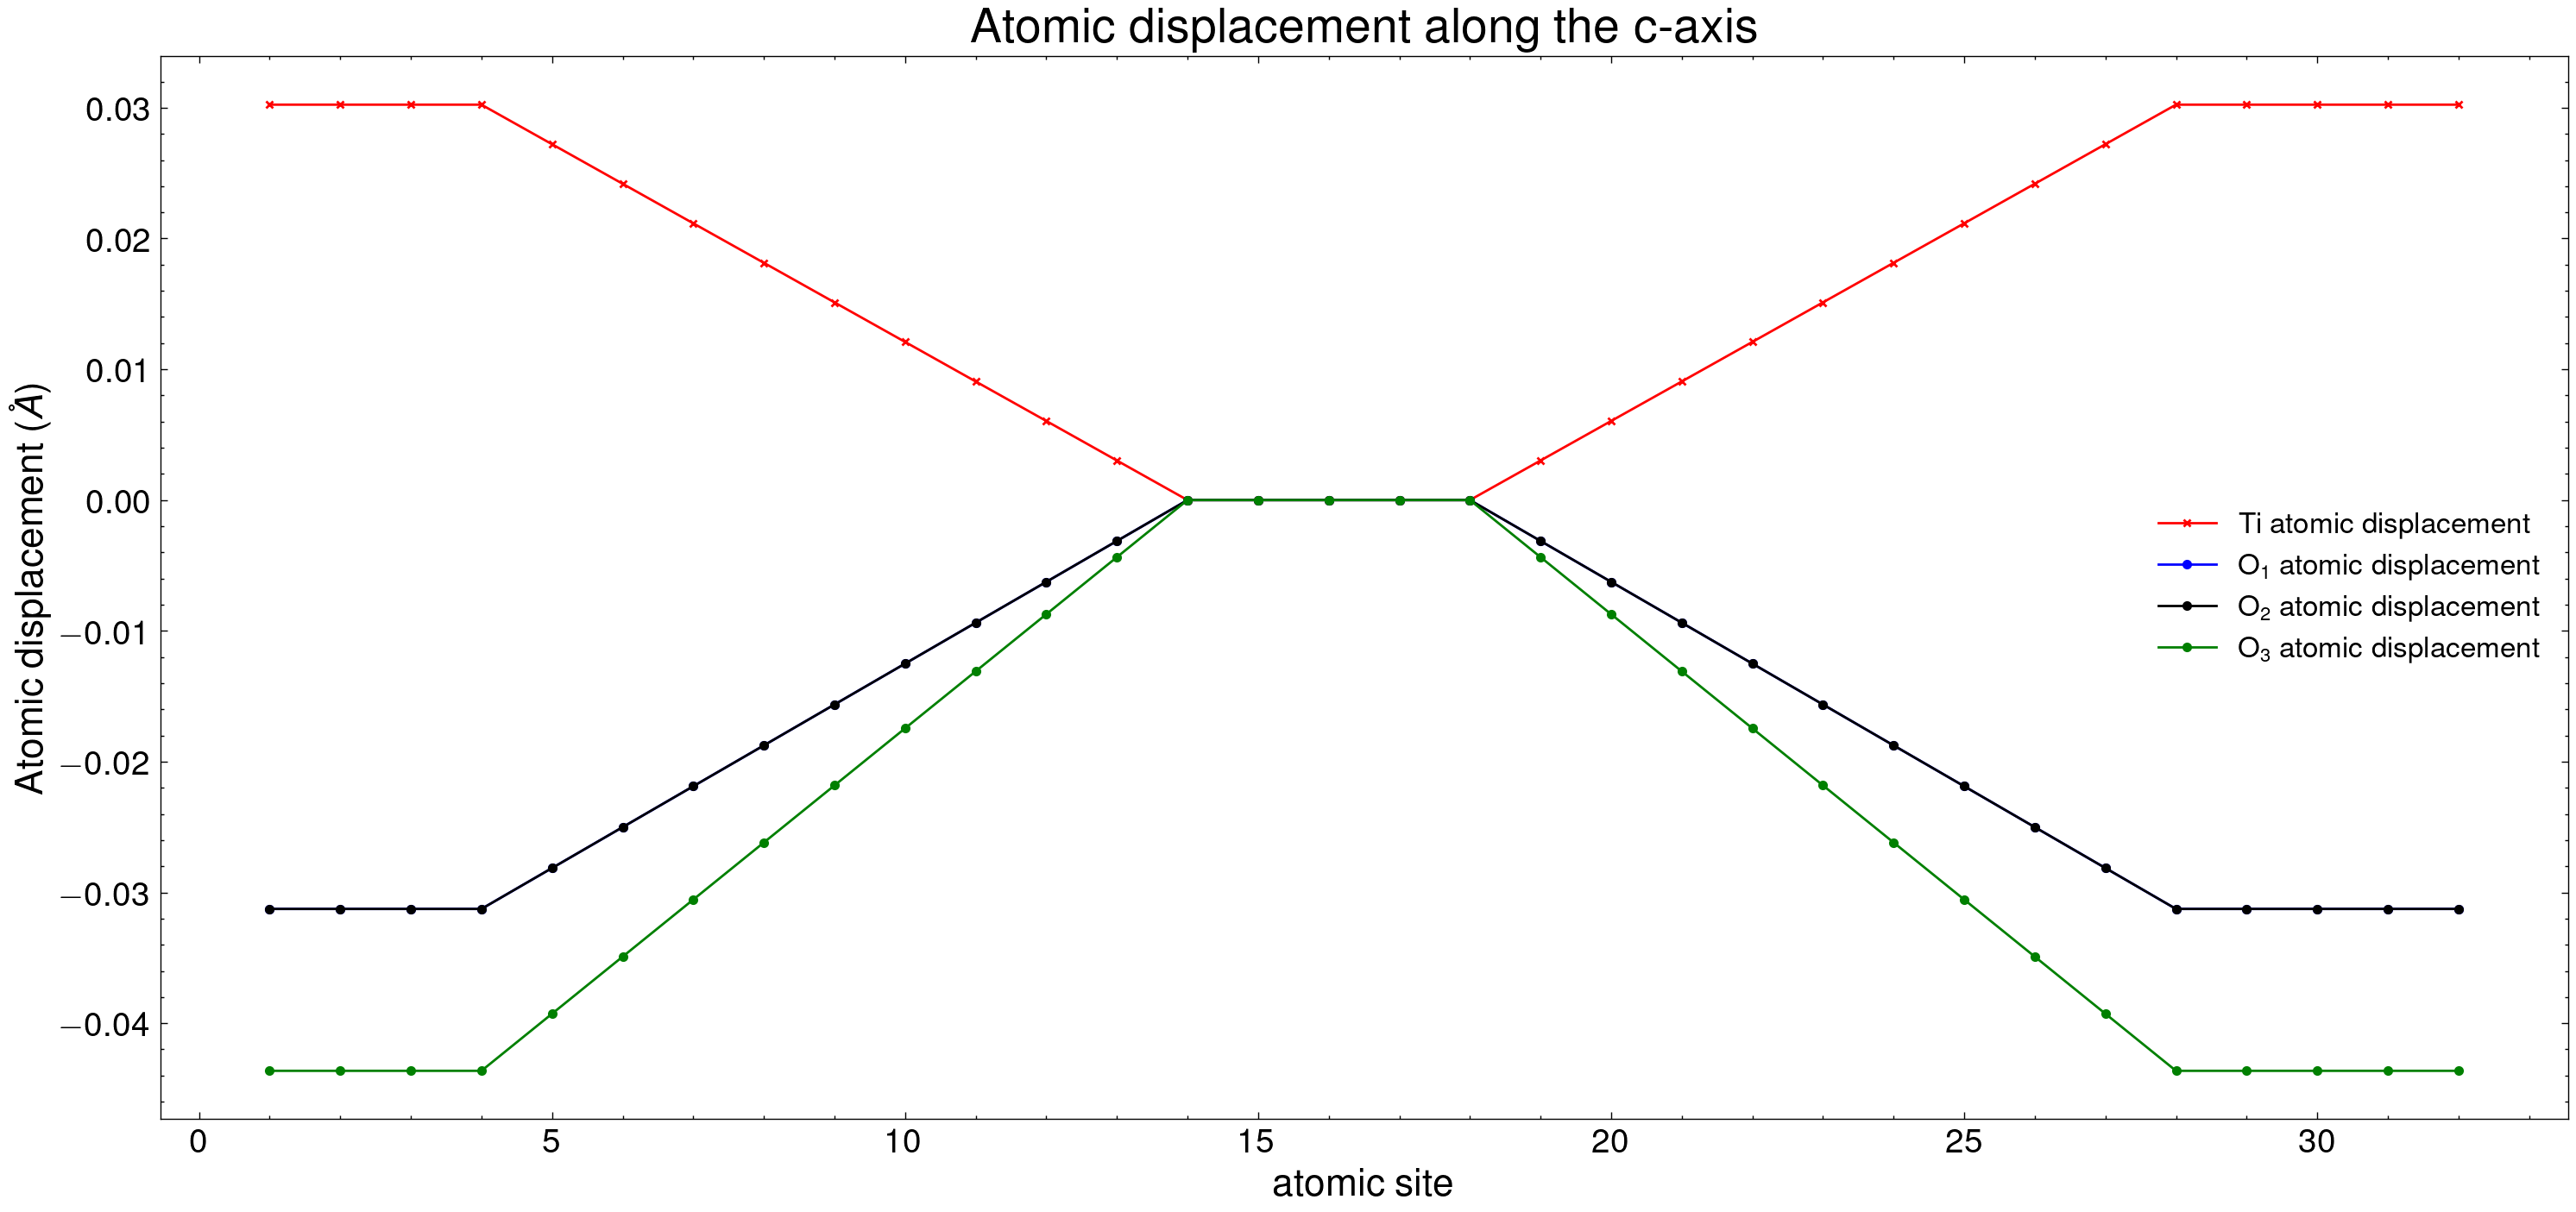

In [20]:

# Read the supercell POSCAR file
sup_poscar = Poscar.from_file('../codes/POSCAR')
sup_struc = sup_poscar.structure
print(sup_struc)

gen_POSCAR = False # Set it false if you only want to analyze the atomic displacement data
num_cell = 32 # Number of unit cells in the supercell
latt = np.array([[ 3.953265, 0, 0], # Tetragonal lattice parameters
                    [ 0, 3.953265, 0],
                    [ 0, 0, 3.953265]])

Ti_z_coord = []
O1_z_coord = []
O2_z_coord = []
O3_z_coord = []
atomic_site = np.arange(1, num_cell+1, 1)   

for i in range(num_cell):
    coord =  np.array([sup_struc.cart_coords[i] - [0, latt[1][1]*i, 0], # Ba
                       sup_struc.cart_coords[i+1*num_cell] - [0, latt[1][1]*i, 0], # Ti
                       sup_struc.cart_coords[i+2*num_cell] - [0, latt[1][1]*i, 0], # O1
                       sup_struc.cart_coords[i+3*num_cell] - [0, latt[1][1]*i, 0], # O2
                       sup_struc.cart_coords[i+4*num_cell] - [0, latt[1][1]*i, 0]]) # O3
    
    new_struc = Structure(lattice=latt, species=["Ba", "Ti", "O", "O", "O"], coords=coord, coords_are_cartesian=True)
    
    Ti_z_coord.append(new_struc.cart_coords[1][2] - latt[2][2]/2)
    O1_z_coord.append(new_struc.cart_coords[2][2] - latt[2][2]/2)
    O2_z_coord.append(new_struc.cart_coords[3][2] - latt[2][2]/2)
    # O3_z_coord.append(new_struc.cart_coords[4][2] - latt[2][2]/2)
    if np.abs(new_struc.cart_coords[4][2]) > 1.5:
        O3_z_coord.append(new_struc.cart_coords[4][2] - latt[2][2])
    else:
        O3_z_coord.append(new_struc.cart_coords[4][2])    
    # if gen_POSCAR == True:
    #     new_struc.to(filename='POSCAR_'f"{i+1:02d}")

xx = atomic_site
plt.figure(figsize=(18, 8), dpi=200)
plt.plot(xx, Ti_z_coord, '-xr',label='Ti atomic displacement')
plt.plot(xx, O1_z_coord, '-ob',label=r'O$_1$ atomic displacement')
plt.plot(xx, O2_z_coord, '-ok',label=r'O$_2$ atomic displacement')
plt.plot(xx, O3_z_coord, '-og',label=r'O$_3$ atomic displacement')
plt.xlabel('atomic site', fontsize=16)
plt.ylabel(r'Atomic displacement ($\AA$)', fontsize=16)
plt.title('Atomic displacement along the c-axis', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=12)
plt.show()

Full Formula (Ba32 Ti32 O96)
Reduced Formula: BaTiO3
abc   :   3.953265 126.504485   3.953265
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (160)
  #  SP      a         b         c  selective_dynamics     velocities
---  ----  ---  --------  --------  ---------------------  ---------------
  0  Ba    0    0         0         [False, False, False]  [0.0, 0.0, 0.0]
  1  Ba    0    0.03125   0         [False, False, False]  [0.0, 0.0, 0.0]
  2  Ba    0    0.0625    0         [False, False, False]  [0.0, 0.0, 0.0]
  3  Ba    0    0.09375   0         [False, False, False]  [0.0, 0.0, 0.0]
  4  Ba    0    0.125     0         [False, False, False]  [0.0, 0.0, 0.0]
  5  Ba    0    0.15625   0         [False, False, False]  [0.0, 0.0, 0.0]
  6  Ba    0    0.1875    0         [False, False, False]  [0.0, 0.0, 0.0]
  7  Ba    0    0.21875   0         [False, False, False]  [0.0, 0.0, 0.0]
  8  Ba    0    0.25      0         [False, False, False]  [0.0, 0.

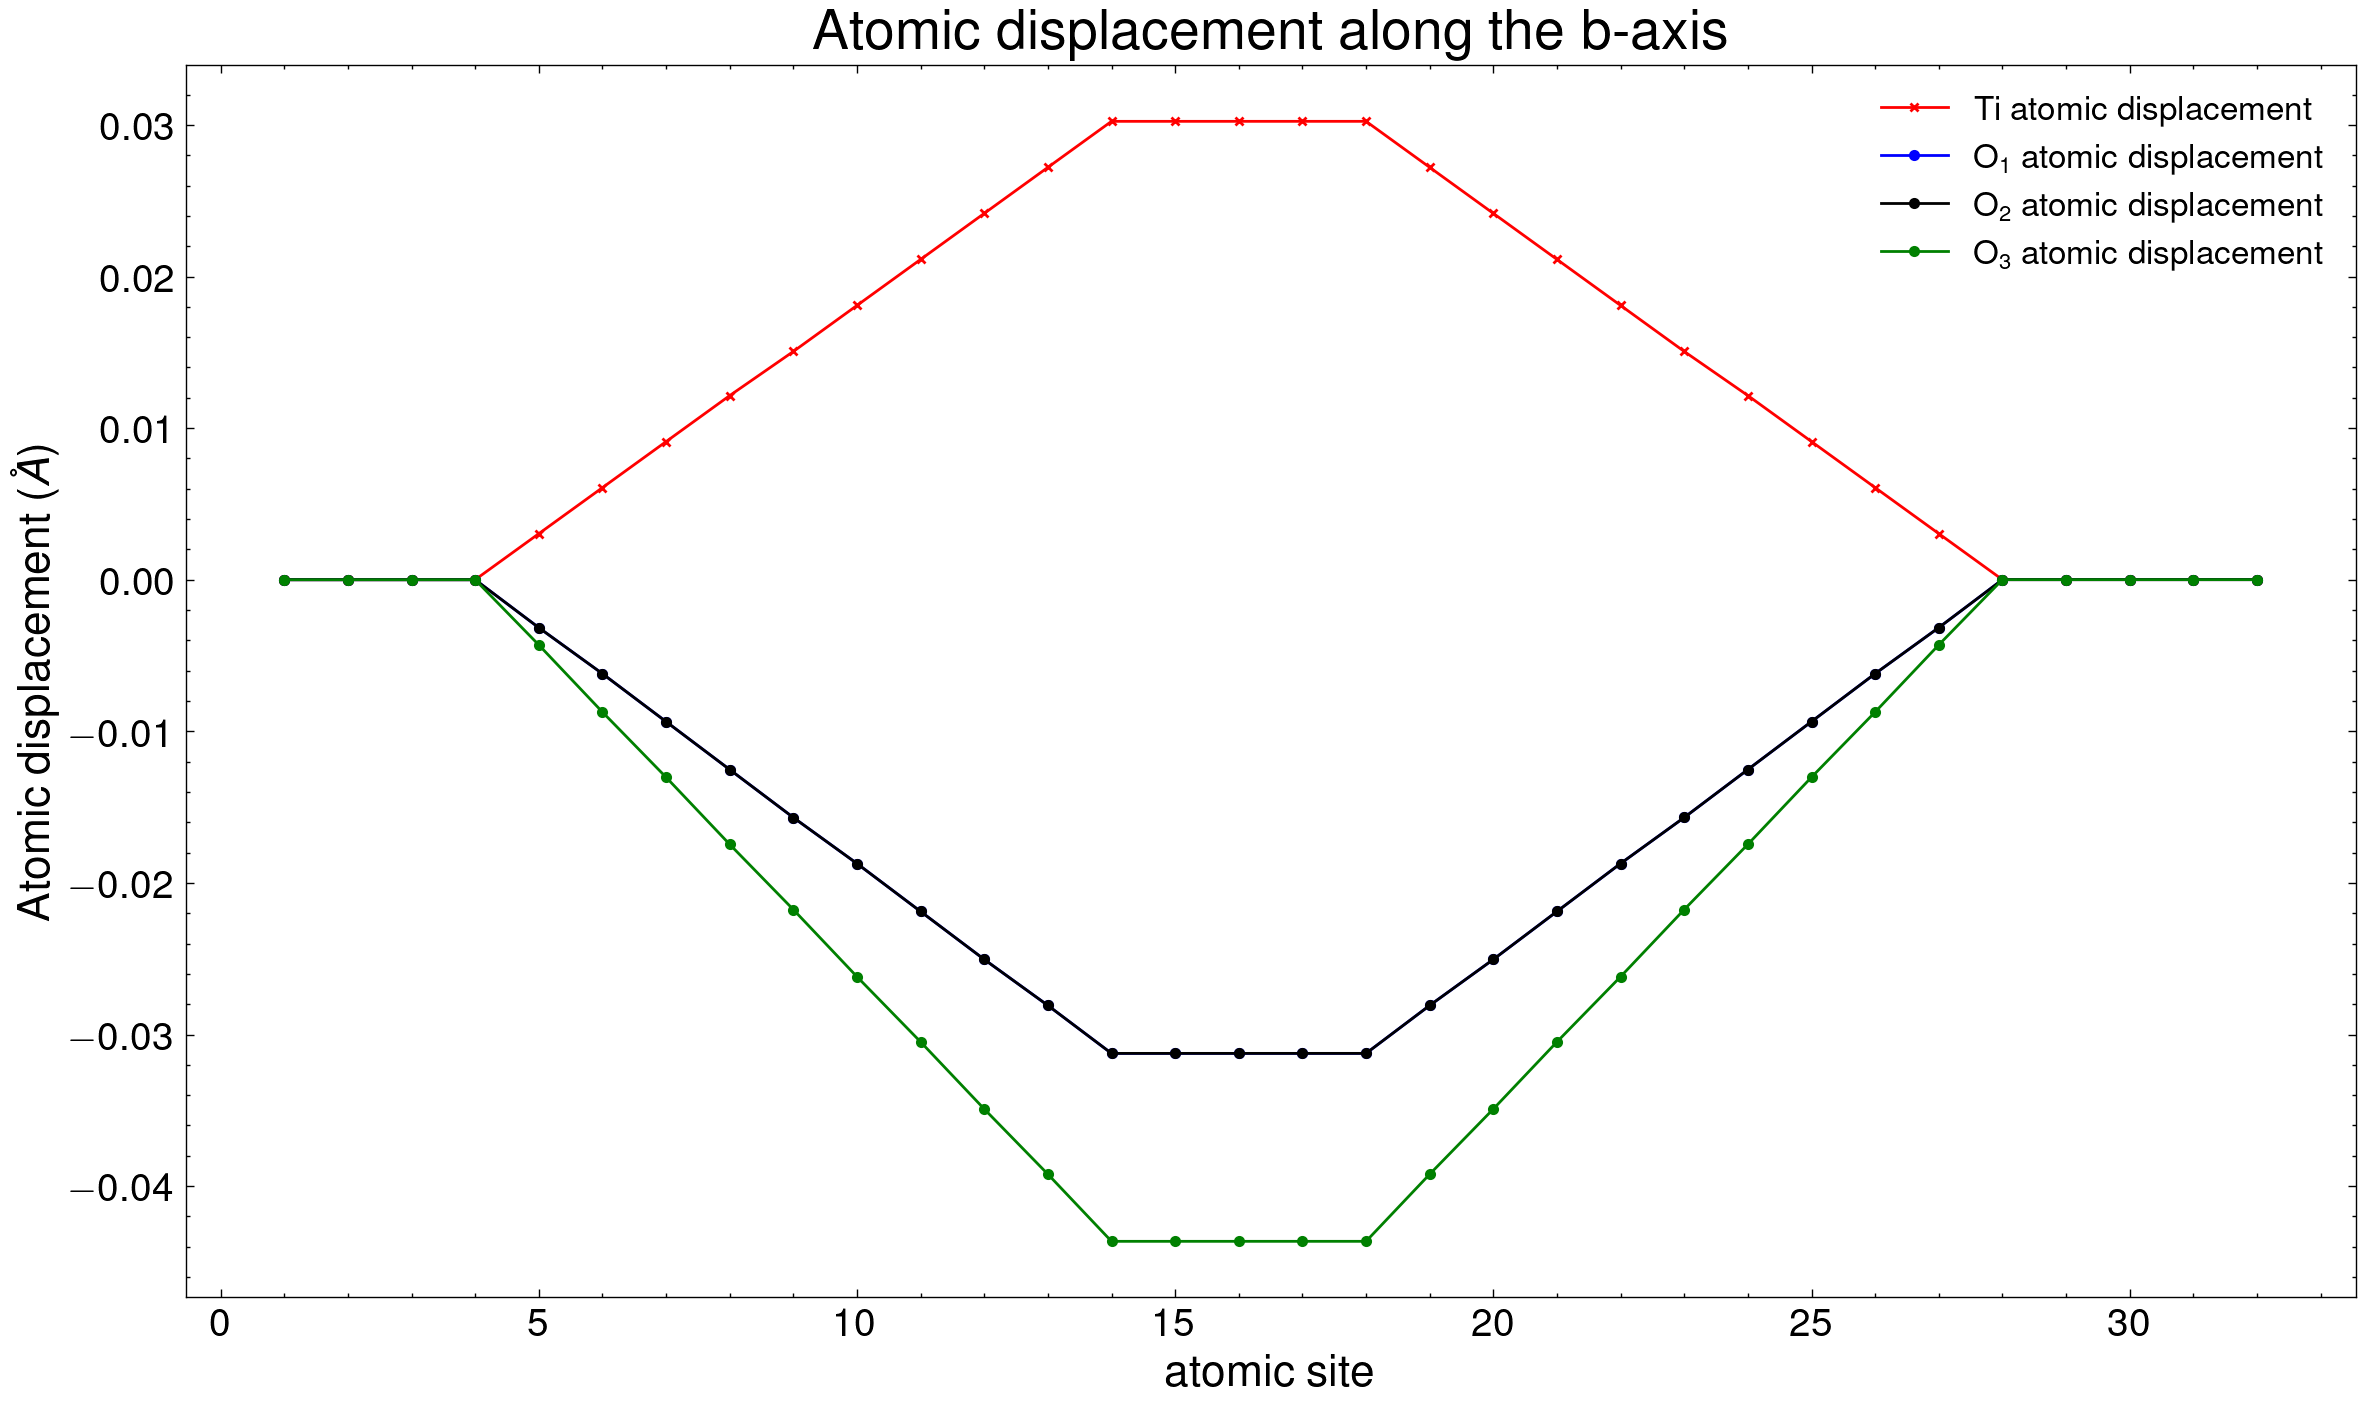

In [16]:

# Read the supercell POSCAR file
sup_poscar = Poscar.from_file('../codes/POSCAR')
sup_struc = sup_poscar.structure
print(sup_struc)

gen_POSCAR = False # Set it false if you only want to analyze the atomic displacement data
num_cell = 32 # Number of unit cells in the supercell
latt = np.array([[ 3.953265, 0, 0], # Tetragonal lattice parameters
                    [ 0, 3.953265, 0],
                    [ 0, 0, 3.953265]])

Ti_y_coord = []
O1_y_coord = []
O2_y_coord = []
O3_y_coord = []
atomic_site = np.arange(1, num_cell+1, 1)   

for i in range(num_cell):
    coord =  np.array([sup_struc.cart_coords[i] - [0, latt[1][1]*i, 0], # Ba
                       sup_struc.cart_coords[i+1*num_cell] - [0, latt[1][1]*i, 0], # Ti
                       sup_struc.cart_coords[i+2*num_cell] - [0, latt[1][1]*i, 0], # O1
                       sup_struc.cart_coords[i+3*num_cell] - [0, latt[1][1]*i, 0], # O2
                       sup_struc.cart_coords[i+4*num_cell] - [0, latt[1][1]*i, 0]]) # O3
    
    new_struc = Structure(lattice=latt, species=["Ba", "Ti", "O", "O", "O"], coords=coord, coords_are_cartesian=True)
    
    Ti_y_coord.append(new_struc.cart_coords[1][1] - latt[1][1]/2)
    O1_y_coord.append(new_struc.cart_coords[2][1] - latt[1][1]/2)
    O2_y_coord.append(new_struc.cart_coords[3][1] - latt[1][1]/2)
    O3_y_coord.append(new_struc.cart_coords[4][1] - latt[2][1]/2)
    # if np.abs(new_struc.cart_coords[4][1]) > 1.5:
    #     O3_y_coord.append(new_struc.cart_coords[4][1] - latt[1][1])
    # else:
    #     O3_y_coord.append(new_struc.cart_coords[4][1])    
    # if gen_POSCAR == True:
    #     new_struc.to(filename='POSCAR_'f"{i+1:02d}")

O2_y_coord = np.array(O2_y_coord) + latt[1][1]/2
O3_y_coord = np.array(O3_y_coord) - latt[1][1]/2
xx = atomic_site
plt.figure(figsize=(14, 8), dpi=200)
plt.plot(xx, Ti_y_coord, '-xr',label='Ti atomic displacement')
plt.plot(xx, O1_y_coord, '-ob',label=r'O$_1$ atomic displacement')
plt.plot(xx, O2_y_coord, '-ok',label=r'O$_2$ atomic displacement')
plt.plot(xx, O3_y_coord, '-og',label=r'O$_3$ atomic displacement')
plt.xlabel('atomic site', fontsize=16)
plt.ylabel(r'Atomic displacement ($\AA$)', fontsize=16)
plt.title('Atomic displacement along the b-axis', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=12)
plt.show()

Full Formula (Ba32 Ti32 O96)
Reduced Formula: BaTiO3
abc   :   3.953265 126.504485   3.953265
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (160)
  #  SP      a         b         c  selective_dynamics     velocities
---  ----  ---  --------  --------  ---------------------  ---------------
  0  Ba    0    0         0         [False, False, False]  [0.0, 0.0, 0.0]
  1  Ba    0    0.03125   0         [False, False, False]  [0.0, 0.0, 0.0]
  2  Ba    0    0.0625    0         [False, False, False]  [0.0, 0.0, 0.0]
  3  Ba    0    0.09375   0         [False, False, False]  [0.0, 0.0, 0.0]
  4  Ba    0    0.125     0         [False, False, False]  [0.0, 0.0, 0.0]
  5  Ba    0    0.15625   0         [False, False, False]  [0.0, 0.0, 0.0]
  6  Ba    0    0.1875    0         [False, False, False]  [0.0, 0.0, 0.0]
  7  Ba    0    0.21875   0         [False, False, False]  [0.0, 0.0, 0.0]
  8  Ba    0    0.25      0         [False, False, False]  [0.0, 0.

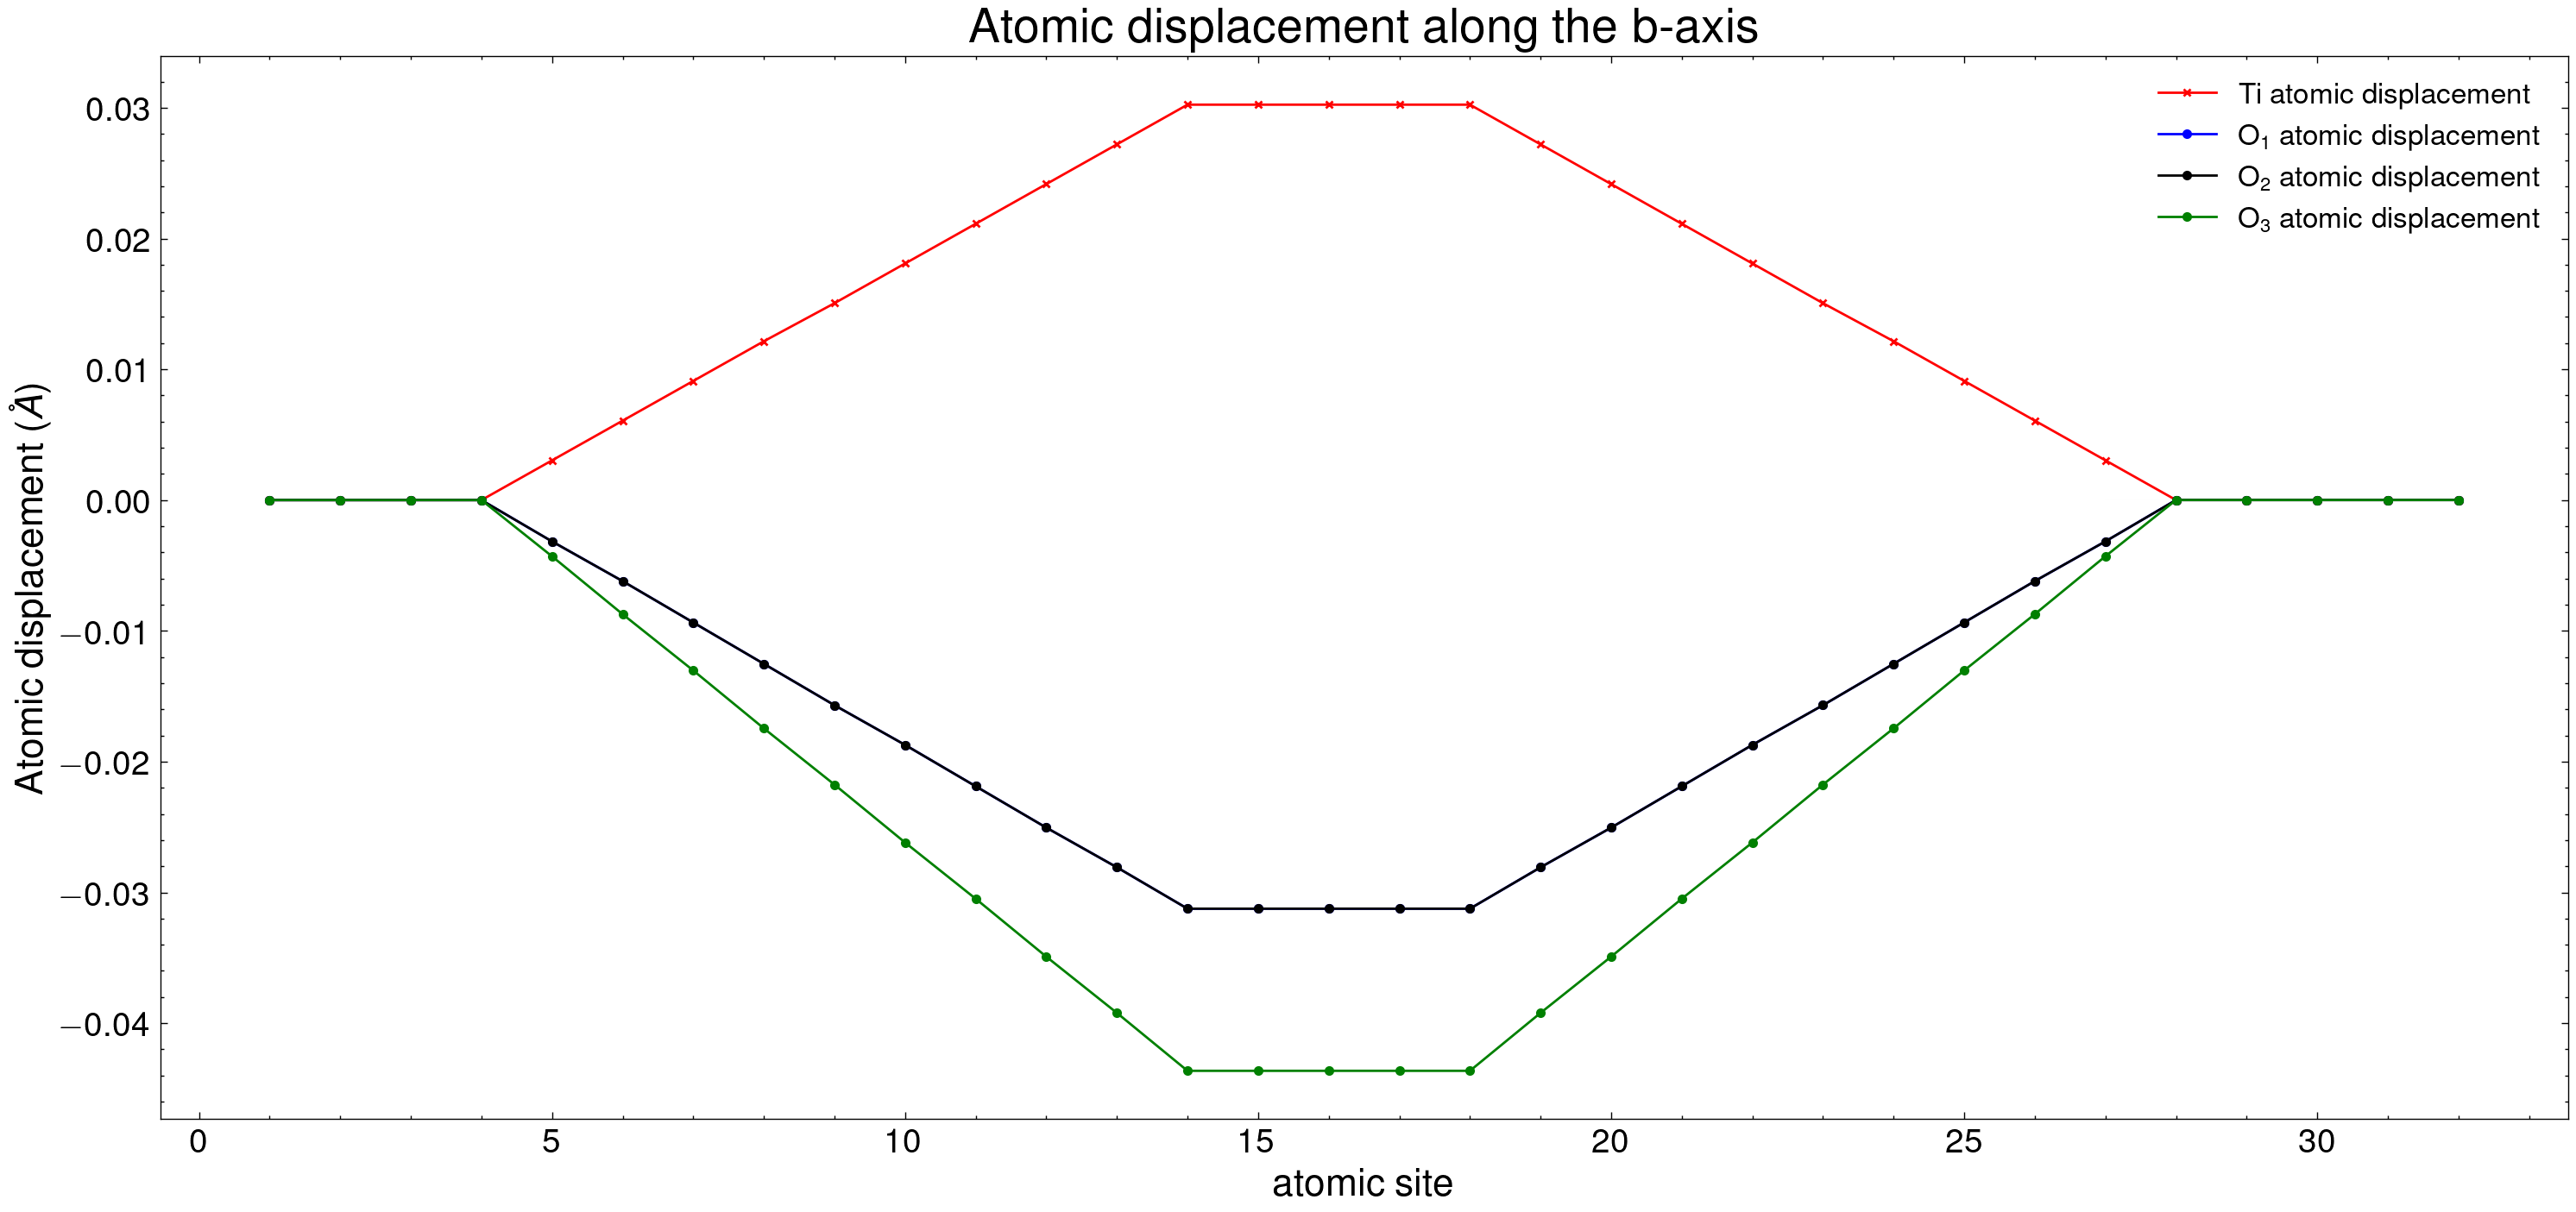

In [21]:

# Read the supercell POSCAR file
sup_poscar = Poscar.from_file('../codes/POSCAR')
sup_struc = sup_poscar.structure
print(sup_struc)

gen_POSCAR = False # Set it false if you only want to analyze the atomic displacement data
num_cell = 32 # Number of unit cells in the supercell
latt = np.array([[ 3.953265, 0, 0], # Tetragonal lattice parameters
                    [ 0, 3.953265, 0],
                    [ 0, 0, 3.953265]])

Ti_y_coord = []
O1_y_coord = []
O2_y_coord = []
O3_y_coord = []
atomic_site = np.arange(1, num_cell+1, 1)   

for i in range(num_cell):
    coord =  np.array([sup_struc.cart_coords[i] - [0, latt[1][1]*i, 0], # Ba
                       sup_struc.cart_coords[i+1*num_cell] - [0, latt[1][1]*i, 0], # Ti
                       sup_struc.cart_coords[i+2*num_cell] - [0, latt[1][1]*i, 0], # O1
                       sup_struc.cart_coords[i+3*num_cell] - [0, latt[1][1]*i, 0], # O2
                       sup_struc.cart_coords[i+4*num_cell] - [0, latt[1][1]*i, 0]]) # O3
    
    new_struc = Structure(lattice=latt, species=["Ba", "Ti", "O", "O", "O"], coords=coord, coords_are_cartesian=True)
    
    Ti_y_coord.append(new_struc.cart_coords[1][1] - latt[1][1]/2)
    O1_y_coord.append(new_struc.cart_coords[2][1] - latt[1][1]/2)
    O2_y_coord.append(new_struc.cart_coords[3][1] - latt[1][1]/2)
    O3_y_coord.append(new_struc.cart_coords[4][1] - latt[2][1]/2)
    # if np.abs(new_struc.cart_coords[4][1]) > 1.5:
    #     O3_y_coord.append(new_struc.cart_coords[4][1] - latt[1][1])
    # else:
    #     O3_y_coord.append(new_struc.cart_coords[4][1])    
    # if gen_POSCAR == True:
    #     new_struc.to(filename='POSCAR_'f"{i+1:02d}")

O2_y_coord = np.array(O2_y_coord) + latt[1][1]/2
O3_y_coord = np.array(O3_y_coord) - latt[1][1]/2
xx = atomic_site
plt.figure(figsize=(18, 8), dpi=200)
plt.plot(xx, Ti_y_coord, '-xr',label='Ti atomic displacement')
plt.plot(xx, O1_y_coord, '-ob',label=r'O$_1$ atomic displacement')
plt.plot(xx, O2_y_coord, '-ok',label=r'O$_2$ atomic displacement')
plt.plot(xx, O3_y_coord, '-og',label=r'O$_3$ atomic displacement')
plt.xlabel('atomic site', fontsize=16)
plt.ylabel(r'Atomic displacement ($\AA$)', fontsize=16)
plt.title('Atomic displacement along the b-axis', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=12)
plt.show()